**Importing modules**

---



In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
import seaborn as sns


**Data Processing**

---



In [13]:
data1= pd.read_csv("https://raw.githubusercontent.com/Kirti-kn/AgroInOne/master/crop_pred%20model/APY.csv")
data2= pd.read_csv("https://raw.githubusercontent.com/Kirti-kn/AgroInOne/master/crop_pred%20model/APY.csv")

In [3]:
data1.head(10)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
5,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Summer,4153.0,2080.0,0.50
6,Andaman and Nicobar Island,NICOBARS,Arecanut,2000,Kharif,1254.0,2000.0,1.59
7,Andaman and Nicobar Island,NICOBARS,Arecanut,2001,Kharif,1254.0,2061.0,1.64
8,Andaman and Nicobar Island,NICOBARS,Arecanut,2002,Whole Year,1258.0,2083.0,1.66
9,Andaman and Nicobar Island,NICOBARS,Arecanut,2003,Whole Year,1261.0,1525.0,1.21


In [4]:
print(data1.columns)

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')


**Checking Null Columns**

---



In [5]:
data1.isnull().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

**Filling Null columns with the average/mean**

---



In [15]:
mn=round(data1["Production"].mean(),2)
data1["Production"].fillna(mn,inplace=True)
data1["Crop"].fillna("Wheat",inplace=True)
data2["Production"].fillna(mn,inplace=True)
data2["Crop"].fillna("Wheat",inplace=True)

In [16]:
data1.isnull().any()

State         False
District      False
Crop          False
Crop_Year     False
Season        False
Area          False
Production    False
Yield         False
dtype: bool

In [14]:
data2.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


**Assigning Numerical Values using label encoder**

---



In [17]:
data1["State"]=l1.fit_transform(data1["State"])
data1["District "]=l1.fit_transform(data1["District "])
data1["Crop"]=l1.fit_transform(data1["Crop"])
data1["Season"]=l1.fit_transform(data1["Season"])

**Separating label and features**

---



In [18]:
x = data1.drop("Yield", axis=1)
y = data1["Yield"]

**Splitting training(80%) and testing(20%) dataset**

---



In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

**Importing model: RandomeForets Regressor**

---



In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=50)

**Training the Model**

---



In [21]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=50)

**Testing**

---



In [22]:
y_pred = rf_model.predict(x_test)

**Finding MAE**

---



In [40]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

5.3553179649041525


**dictionary for columns containing values as their key and corresponding numerical value as their values.**

---



In [37]:
state_dict ={}
district_dict={}
crop_dict={}
season_dict={}

for i,j in zip(data1['State'],data2['State']):
  state_dict[j]=i

for i,j in zip(data1['District '],data2['District ']):
  district_dict[j]=i

for i,j in zip(data1['Crop'],data2['Crop']):
  crop_dict[j]=i

for i,j in zip(data1['Season'],data2['Season']):
  season_dict[j]=i      

In [38]:
print(state_dict)
print(district_dict)
print(crop_dict)
print(season_dict)

{'Andaman and Nicobar Island': 0, 'Andhra Pradesh': 1, 'Arunachal Pradesh': 2, 'Assam': 3, 'Bihar': 4, 'CHANDIGARH': 5, 'Chhattisgarh': 6, 'Dadra and Nagar Haveli': 7, 'Daman and Diu': 8, 'Delhi': 9, 'Goa': 10, 'Gujarat': 11, 'Haryana': 12, 'Himachal Pradesh': 13, 'Jammu and Kashmir': 14, 'Jharkhand': 15, 'Karnataka': 16, 'Kerala': 17, 'Laddak': 18, 'Madhya Pradesh': 19, 'Maharashtra': 20, 'Manipur': 21, 'Meghalaya': 22, 'Mizoram': 23, 'Nagaland': 24, 'Odisha': 25, 'Puducherry': 26, 'Punjab': 27, 'Rajasthan': 28, 'Sikkim': 29, 'Tamil Nadu': 31, 'Telangana': 32, 'THE DADRA AND NAGAR HAVELI': 30, 'Tripura': 33, 'Uttar Pradesh': 34, 'Uttarakhand': 35, 'West Bengal': 36}
{'NICOBARS': 464, 'NORTH AND MIDDLE ANDAMAN': 468, 'SOUTH ANDAMANS': 611, 'ANANTAPUR': 23, 'EAST GODAVARI': 183, 'KRISHNA': 361, 'VIZIANAGARAM': 684, 'WEST GODAVARI': 692, 'ADILABAD': 0, 'CHITTOOR': 129, 'GUNTUR': 229, 'KADAPA': 293, 'KARIMNAGAR': 319, 'KHAMMAM': 331, 'KURNOOL': 366, 'MAHBUBNAGAR': 395, 'MEDAK': 417, 'NALG

**Final Model**

---



In [39]:
final_model=rf_model

**Accuracy**

---



In [41]:
accuracy_percentage = 100 - mae / np.mean(y_test) * 100
print('Accuracy percentage: %.2f%%' % accuracy_percentage)

Accuracy percentage: 92.93%


**Correlation**

---



In [49]:
corr_with_target = data1.corr()['Yield'].sort_values(ascending=False)
print(corr_with_target)

Yield         1.000000
Production    0.437376
Season        0.129001
District      0.012787
Crop_Year     0.008563
State         0.001948
Area          0.000423
Crop         -0.104679
Name: Yield, dtype: float64


<Axes: >

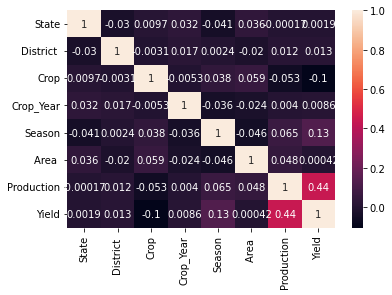

In [50]:
corr_with_target = data1.corr()
sns.heatmap(corr_with_target,annot=True)

**You came remove the columns that not correlated or weakly correlated with the target column while training.**